In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
#importing manager csv
female_labor = pd.read_csv('Data/labor_participation.csv')
female_labor.head()

,country,country_code,new_code,latitude,longitude,indicator_name,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,Aruba,ABW,AW,12.52,-69.97,labor force participation rate,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,AF,33.94,67.71,labor force participation rate,14.94,14.94,15.34,15.85,16.76,17.74,18.76,19.84,20.97,21.42,21.59
2,Angola,AGO,AO,-11.20,17.87,labor force participation rate,75.70,75.77,75.85,75.91,75.97,76.02,76.07,76.11,76.13,76.14,76.14
3,Albania,ALB,AL,41.15,20.17,labor force participation rate,45.00,45.76,46.51,47.37,43.31,43.30,46.10,46.45,46.79,46.80,46.71
4,Andorra,AND,AD,42.55,1.60,labor force participation rate,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
#removing additional years
female_labor_2019=female_labor[["new_code", "year_2019"]]
female_labor_2019.head()

,new_code,year_2019
0,AW,0.00
1,AF,21.59
2,AO,76.14
3,AL,46.71
4,AD,0.00


In [10]:
#renaming 2019

female_labor_2019_final=female_labor_2019.rename(columns = {
    "year_2019" :"labor"
})
female_labor_2019_final.head()

,new_code,labor
0,AW,0.00
1,AF,21.59
2,AO,76.14
3,AL,46.71
4,AD,0.00


In [11]:
#importing parliament
female_parliament = pd.read_csv('Data/parliament_seats.csv')
female_parliament.head()

,country,country_code,new_code,latitude,longitude,indicator_name,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,Albania,ALB,AL,41.15,20.17,parliament,16.43,16.43,15.71,15.71,17.86,20.00,20.71,22.86,27.86,27.86,29.51
1,Algeria,DZA,DZ,28.03,1.66,parliament,7.71,7.71,7.97,31.60,31.60,31.60,31.60,31.60,25.76,25.76,25.76
2,Andorra,AND,AD,42.55,1.60,parliament,35.71,35.71,50.00,50.00,50.00,50.00,39.29,32.14,32.14,32.14,46.43
3,Angola,AGO,AO,-11.20,17.87,parliament,38.64,38.64,38.18,34.09,34.09,36.82,36.82,36.82,30.45,30.45,30.00
4,Antigua and Barbuda,ATG,AG,17.06,-61.80,parliament,10.53,10.53,10.53,10.53,10.53,11.11,11.11,11.11,11.11,11.11,11.11


In [12]:
#reducing columns
female_parliament_2019=female_parliament[["new_code", "year_2019"]]
female_parliament_2019.head()

,new_code,year_2019
0,AL,29.51
1,DZ,25.76
2,AD,46.43
3,AO,30.00
4,AG,11.11


In [13]:
#renaming 2019
female_parliament_2019_final=female_parliament_2019.rename(columns = {
    "year_2019" :"parliament"
})
female_parliament_2019_final.head()


,new_code,parliament
0,AL,29.51
1,DZ,25.76
2,AD,46.43
3,AO,30.00
4,AG,11.11


In [14]:
labor_regression=pd.merge(female_parliament_2019_final, female_labor_2019_final, how='inner', on=["new_code", "new_code"])
labor_regression=labor_regression[(labor_regression["labor"]>0)]


In [15]:
labor_regression

,new_code,parliament,labor
0,AL,29.51,46.71
1,DZ,25.76,14.59
3,AO,30.00,76.14
5,AM,23.48,47.07
6,AU,30.46,60.30
...,...,...,...
129,UZ,16.00,52.38
130,VU,0.00,60.96
131,VN,26.72,72.71
132,ZM,17.96,70.37


In [16]:
X = labor_regression["parliament"].values.reshape(-1, 1)
y = labor_regression["labor"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (121, 1) (121, 1)


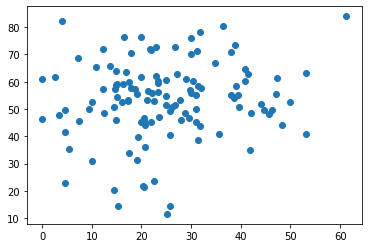

In [17]:
plt.scatter(X,y)

In [18]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [19]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.15815702]]
y-axis intercept:  [49.43177952]


In [21]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[61.25]]


In [22]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

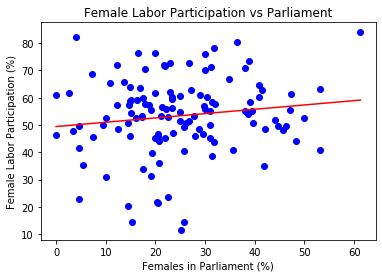

In [23]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel('Females in Parliament (%)')
plt.ylabel('Female Labor Participation (%)')
plt.title('Female Labor Participation vs Parliament')
plt.savefig('static/images/labor_parliament_regression.svg')